# Pymaceuticals Inc.
---

### Analysis - Review all the figures and tables that you generated in this assignment. Write at least three observations or inferences that can be made from the data. Include these observations at the top of your notebook.


- Observation 1 - Mouse weight and average tumor volume tend to move in the same direction. When mouse weight increases, there is a tendency for the average tumor volume to increase as well. Overall, a correlation coefficient of 0.8419 indicates a strong positive relationship between mouse weight and average tumor volume in the Capomulin regimen.

- Observation 2 - Tumor Volume: Capomulin and Ramicane have lower mean and median tumor volumes compared to other drugs, indicating their potential effectiveness in reducing tumor size. Tumor Volume Variance and Standard Deviation: Capomulin and Ramicane have relatively lower tumor volume variance and standard deviation, implying more consistent results compared to other drugs.

- Observation 3 - Tumor Volume Variance: From the dataset, Ketapril, Naftisol, Placebo, and Stelasyn have higher variance values, suggesting a wider range of tumor sizes in the samples treated with these drugs. Tumor Volume Std. Deviation: Similar to the tumor volume variance, Ketapril, Naftisol, Placebo, and Stelasyn have higher standard deviation values, indicating more varied tumor sizes within the samples.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Count the number of unique Mouse IDs
unique_mouse_ids = combined_data['Mouse ID'].nunique()

# Print the count of unique Mouse IDs
print("Number of unique Mouse IDs:", unique_mouse_ids)


Number of unique Mouse IDs: 249


In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Find the duplicate mice by ID number and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the Mouse ID with duplicates
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Print the Mouse IDs with duplicates
print("Mouse IDs with duplicates:", duplicate_mouse_ids)



Mouse IDs with duplicates: ['g989']


In [11]:
# Filter the data for the duplicate mouse ID
duplicate_mouse_data = combined_data[combined_data['Mouse ID'] == 'g989']

# Print the data for the duplicate mouse ID
print("Data for the duplicate mouse ID:")

duplicate_mouse_data



Data for the duplicate mouse ID:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [57]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

# Print the clean DataFrame
print("Cleaned DataFrame:")


# Export the cleaned DataFrame to a CSV file
cleaned_data.to_csv('cleaned_data.csv', index=False)

cleaned_data



Cleaned DataFrame:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Checking the number of mice in the clean DataFrame
num_mice = cleaned_data['Mouse ID'].nunique()

# Print the number of mice
print("Number of mice:", num_mice)



Number of mice: 249


## Summary Statistics

In [16]:
# Group the data by "Drug Regimen"
grouped_data = cleaned_data.groupby("Drug Regimen")

# Calculate the summary statistics
summary_stats = grouped_data["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Rename the columns for better readability
summary_stats = summary_stats.rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Tumor Volume Variance",
    "std": "Tumor Volume Std. Dev.",
    "sem": "Tumor Volume Std. Err."
})

# Print the summary statistics table
print("Summary Statistics Table:")
summary_stats

Summary Statistics Table:


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# Generate the summary statistics table in a single line
summary_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean",
    median="median",
    var="var",
    std="std",
    sem="sem"
).rename(columns={
    "mean": "mean",
    "median": "median",
    "var": "var",
    "std": "std",
    "sem": "sem"
}).reset_index()

# Print the summary statistics table
print("Summary Statistics Table:")

summary_stats




Summary Statistics Table:


,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [74]:
# SORTING - creating a Cell to SORT by a Column of my selecting
sorted_df = summary_stats.sort_values(by='mean', ascending=False)
sorted_df

,Drug Regimen,mean,median,var,std,sem
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955


## Bar and Pie Charts

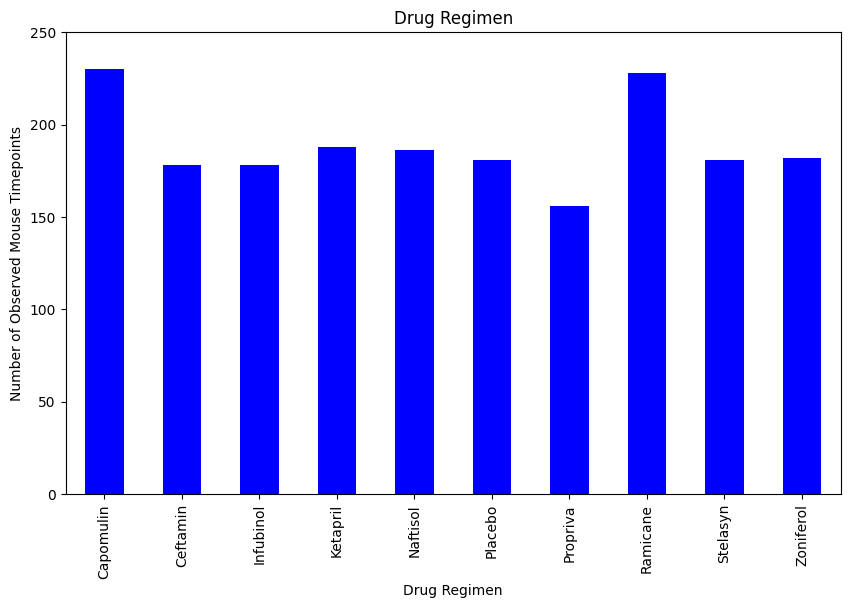

In [23]:
# PANDAS DATAFRAME
# Group the data by "Drug Regimen" and count the number of rows for each drug
drug_counts = cleaned_data.groupby("Drug Regimen").size()

# Create the bar chart using the DataFrame.plot() method
ax = drug_counts.plot(kind='bar', figsize=(10, 6), color='blue')

# Set the x-axis label and title
ax.set_xlabel("Drug Regimen")
ax.set_title("Drug Regimen")

# Set the y-axis label and limit
ax.set_ylabel("Number of Observed Mouse Timepoints")
ax.set_ylim(0, 250)

# Show the plot
plt.show()



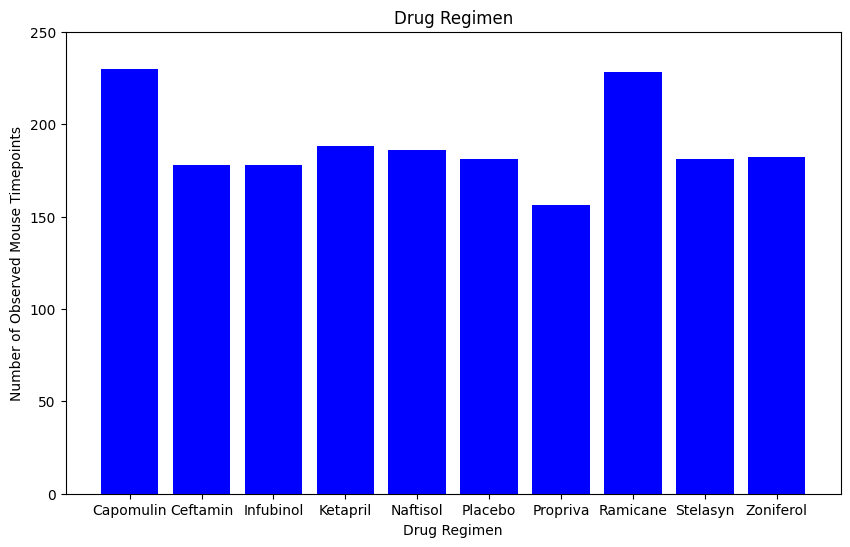

In [26]:
# MATPLOTLIB PYPLOT METHOD
# Group the data by "Drug Regimen" and count the number of rows for each drug
drug_counts = cleaned_data.groupby("Drug Regimen").size()

# Create the bar chart using Matplotlib's pyplot methods
plt.figure(figsize=(10, 6))
plt.bar(drug_counts.index, drug_counts, color='blue')

# Set the x-axis label and title
plt.xlabel("Drug Regimen")
plt.title("Drug Regimen")

# Set the y-axis label and limit
plt.ylabel("Number of Observed Mouse Timepoints")
plt.ylim(0, 250)

# Show the plot
plt.show()


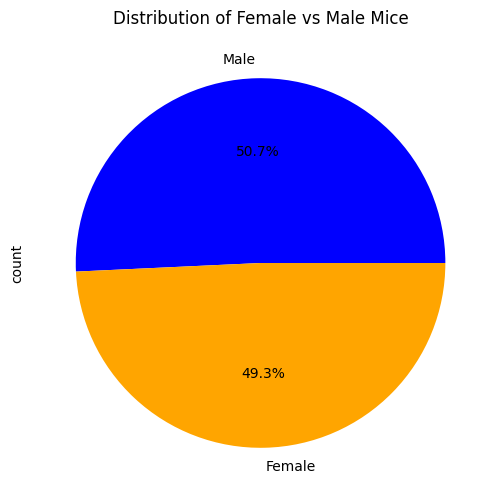

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Pandas DataFrame.plot() method
# Count the number of female and male mice in the study
gender_counts = cleaned_data['Sex'].value_counts()

# Create the pie chart using the DataFrame.plot() method
ax = gender_counts.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', colors=['blue', 'orange'])

# Set the title
ax.set_title("Distribution of Female vs Male Mice")

# Show the plot
plt.show()


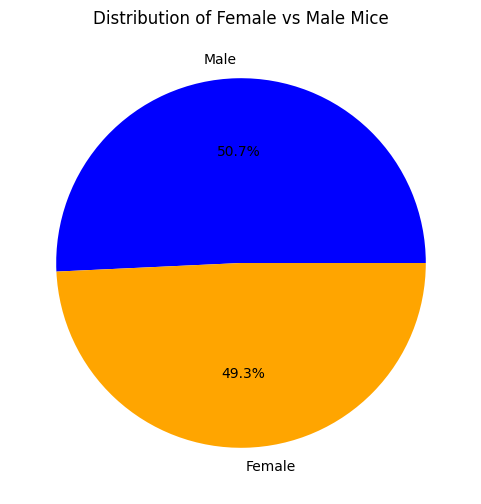

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# MATPLOTLIB PYPLOT METHOD
# Count the number of female and male mice in the study
gender_counts = cleaned_data['Sex'].value_counts()

# Create the pie chart using Matplotlib's pyplot methods
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'orange'])

# Set the title
plt.title("Distribution of Female vs Male Mice")

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Calculate Quartiles, Find Outliers, and Create a Box Plot

# Create a grouped DataFrame that shows the last (greatest) time point for each mouse
grouped_df = cleaned_data.groupby('Mouse ID').max()['Timepoint']

# Merge the grouped DataFrame with the original cleaned DataFrame
merged_df = pd.merge(cleaned_data, grouped_df, on=['Mouse ID', 'Timepoint'], how='inner')



In [41]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
# Create a list that holds the treatment names
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to hold the tumor volume data
tumor_volume_data = [] 

# Loop through each drug in the treatment list
for drug in treatment_list:
    # Locate the rows in the merged DataFrame that correspond to each treatment
    tumor_volume = merged_df.loc[merged_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # Append the resulting final tumor volumes for each drug to the empty list
    tumor_volume_data.append(tumor_volume)
    
    # Calculate quartiles and IQR
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    
    # Determine outliers
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
    # Print the results
    print(f"Outliers for {drug}: {outliers}")


Outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Infubinol: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


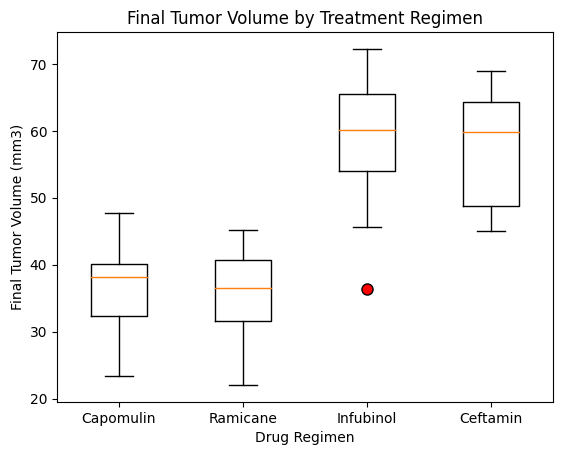

In [42]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Generate a box plot
plt.boxplot(tumor_volume_data, labels=treatment_list, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8})

# Add title and labels
plt.title('Final Tumor Volume by Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

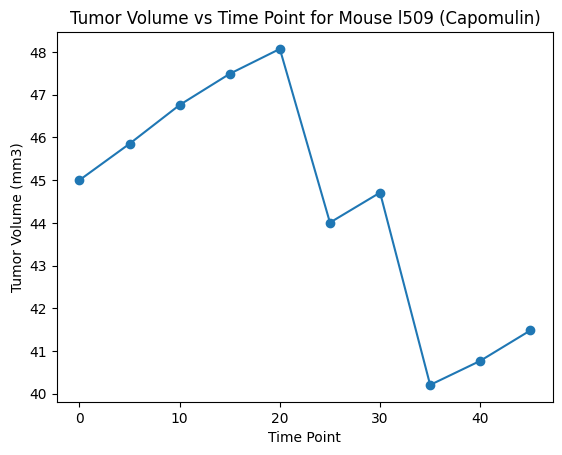

In [72]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Create a Line Plot and a Scatter Plot

# Select a single mouse that was treated with Capomulin
selected_mouse = cleaned_data.loc[cleaned_data['Drug Regimen'] == 'Capomulin', 'Mouse ID'].iloc[202]

# Generate a line plot of tumor volume versus time point for the selected mouse
mouse_data = cleaned_data.loc[cleaned_data['Mouse ID'] == selected_mouse]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')

# Add title and labels
plt.title(f"Tumor Volume vs Time Point for Mouse {selected_mouse} (Capomulin)")
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

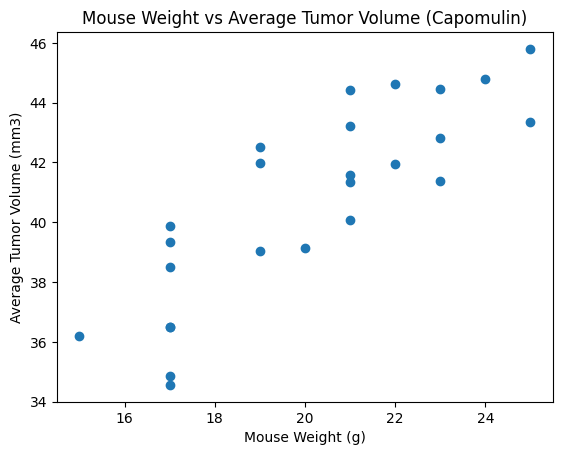

In [48]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Convert data types to numeric using .loc
capomulin_data.loc[:, 'Tumor Volume (mm3)'] = pd.to_numeric(capomulin_data['Tumor Volume (mm3)'])
capomulin_data.loc[:, 'Weight (g)'] = pd.to_numeric(capomulin_data['Weight (g)'])

# Generate a scatter plot of mouse weight versus average observed tumor volume for the entire Capomulin treatment regimen
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(mouse_weight, average_tumor_volume)

# Add title and labels
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()


## Correlation and Regression

Correlation between mouse weight and average tumor volume: 0.841936342469472


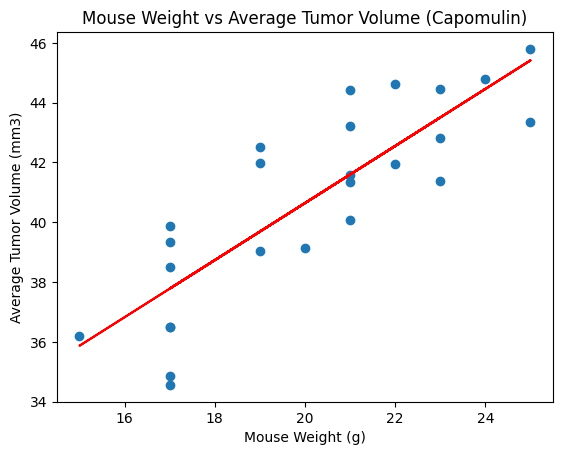

In [49]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Generate a scatter plot of mouse weight versus average observed tumor volume for the entire Capomulin treatment regimen
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate the correlation coefficient between mouse weight and average observed tumor volume
correlation = st.pearsonr(mouse_weight, average_tumor_volume)[0]
print(f"Correlation between mouse weight and average tumor volume: {correlation}")

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, average_tumor_volume)

# Calculate the regression values
regress_values = mouse_weight * slope + intercept

# Generate a scatter plot with linear regression line
plt.scatter(mouse_weight, average_tumor_volume)
plt.plot(mouse_weight, regress_values, color='red')

# Add title and labels
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()
